# Assignment 3: Different types of Machine Learning and their Applications  

## Instructions:  

Write your code in a clear and well-organized manner and comment your code to explain your thought process.  

**Dataset: Heart Disease Dataset**  
The dataset for this assignment is the heart disease dataset from Kaggle (`heart.csv`). This dataset contains information about patients and the presence of heart disease.  
Features of the dataset:  
The dataset contains 1025 individuals’ data with 14 features set. The detailed description of all the features are as follows:  
1. **_Age_**: Age in years.  
2. **_Sex_**: Male = 1, Female = 0.  
3.	**_Cp_**: Chest pain type (4 values).  
4. **_Trestbps_**: Resting blood pressure (in mm Hg on admission to the hospital).  
5. **_Chol_**: Serum cholesterol in mg/dl.  
6. **_Fbs_**: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).  
7. **_Restecg_**: Resting electrocardiographic results (values 0,1,2).  
8. **_Thalach_**: Maximum heart rate achieved.   
9. **_Exang_**: Exercise induced angina (1 = yes; 0 = no).  
10. **_Oldpeak_**: ST depression induced by exercise relative to rest.  
11. **_Slope_**: the slope of the peak exercise ST segment.  
12. **_Ca_**: number of major vessels (0-3) colored by fluoroscopy.  
13. **_thal_**: 0 = normal; 1 = fixed defect; 2 = reversable defect.  
14. **_Target_**: 0 = no disease and 1 = disease.  



**Note:** These features are a mix of Categorical and Continuous variables! Keep this in mind as you're doing the tasks below and the models you select!

## Task 1: Supervised Learning (Classification)  
1. Import the necessary libraries (`pandas`, `sklearn`, `matplotlib.pyplot`, etc.).  
2. Load the heart disease dataset and split it into features (`X`) and target labels (`y`).  
3. Split the data into training and testing sets (80-20 split).  
4. Choose a classification model (e.g., Logistic Regression, Ordinary Least Squares, etc.) and train it on the training data. Choose one! (Remember to think about the data! Hint: Should you use all of the features? Which model is best for which kind of data?)  
5. Evaluate the model's performance using appropriate metrics (e.g., accuracy, precision, recall, etc.) on the testing data and print the results.  


In [3]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [4]:
# Step 2: Load the heart disease dataset
heart_data = pd.read_csv('heart.csv')

# Split the dataset into features (X) and target labels (y)
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [5]:
# Step 3: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Choose a classification model and train it on the training data
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [7]:
# Step 5: Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## Task 2: Unsupervised Learning (Clustering)  
1. Import the necessary libraries.  
2. Extract relevant features (`X`) from the heart disease dataset. Which ones would you keep for this? (Note that here we do not have labels, make sure you aren’t including the `target` variable).  
3. Standardize the feature data using `StandardScaler` from `sklearn.preprocessing`. Why is this important? Create a text cell and write your answers there.  
4. Apply a clustering algorithm (e.g., K-Means, Agglomerative Clustering, etc.) to find the structure in the data. Choose one!  
5. Visualize the clustering results using scatter plots or other suitable visualization methods. Can you figure out how the features you selected differ between these clusters i.e. what are the clusters that seem to be "driving" the clustering? (Hint: You can visualize the differences using scatterplots too! You might want to look into coloring the points by value...)  



In [8]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [9]:
# Step 2: Extract relevant features (X) from the heart disease dataset. For clustering, I will keep continuous features
X_cluster = heart_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

In [10]:
# Step 3: Standardize the feature data using StandardScaler
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

In [11]:
# Try k values from 2 to 10 (or a suitable range)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_cluster_scaled, labels)
    print(f"For k={k}, Silhouette Score = {score}")
    
# Step 4: Apply a clustering algorithm (K-Means), Let's choose K=2 for the number of clusters on the basis of Silhouette Score
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster_scaled)

For k=2, Silhouette Score = 0.24226730069971336
For k=3, Silhouette Score = 0.22942764542081107
For k=4, Silhouette Score = 0.2012347593022594


For k=5, Silhouette Score = 0.21559938394273578
For k=6, Silhouette Score = 0.20495725309099252


For k=7, Silhouette Score = 0.19563324151391875
For k=8, Silhouette Score = 0.1865377342124909


For k=9, Silhouette Score = 0.19284563285399414
For k=10, Silhouette Score = 0.1927098663285667


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


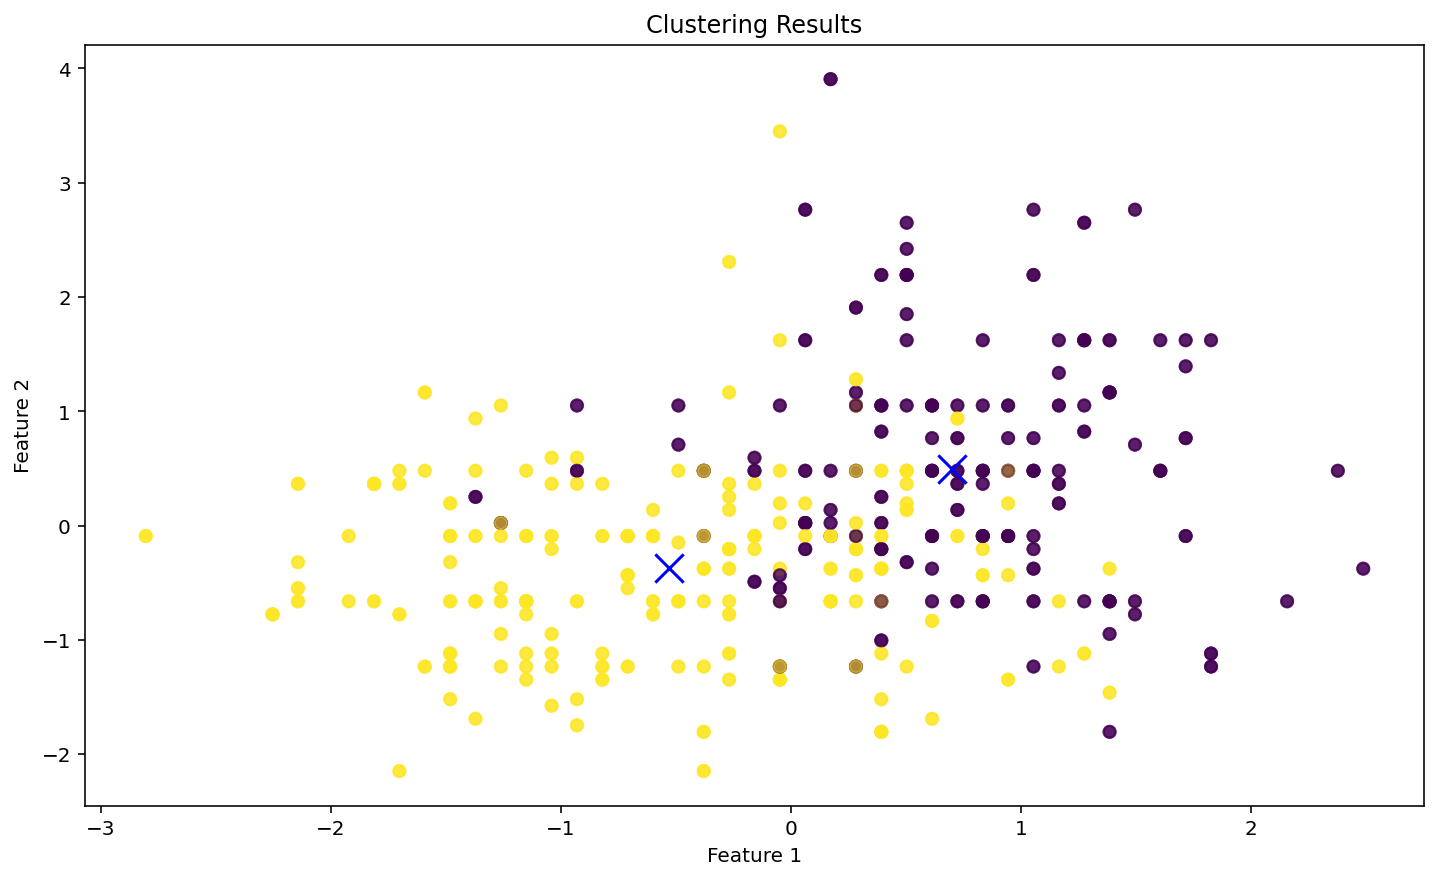

In [12]:
# Step 5: Visualize the clustering results
cluster_centers = kmeans.cluster_centers_
plt.scatter(X_cluster_scaled[:, 0], X_cluster_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', marker='x', s=200)
plt.title('Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Task 3: Analysis and Comparison (Short answers) – You may want use Text cells for this  
1. Write a brief explanation of the supervised classification model you used, its significance in clinical data analysis, and the metrics you considered for evaluation.  
2. Write a brief explanation of the unsupervised clustering algorithm you applied, its potential benefits in clinical research, and any insights gained from the visualization.  
3. Briefly reflect on how machine learning techniques can contribute to improved patient care and medical research.  


Task 3.1: The supervised classification model employed here is Logistic Regression. Logistic Regression is a well-established statistical method for binary classification tasks, making it suitable for predicting whether an individual has heart disease or not based on various clinical features.

Significance in Clinical Data Analysis: Logistic Regression holds significance in clinical data analysis for the following reasons:

    Interpretability: Logistic Regression provides interpretable coefficients for each feature, allowing healthcare professionals to understand how different factors contribute to the likelihood of heart disease.

    Probability Estimation: The model outputs probabilities, helping clinicians assess the likelihood of a patient having heart disease. This information aids in making informed decisions about further diagnostic tests or treatment plans.

    Efficiency: Logistic Regression is computationally efficient, making it practical for clinical settings with limited computational resources.

Metrics Considered for Evaluation: The evaluation metrics provide a comprehensive view of the model's performance:

    Accuracy: The overall correctness of the model, indicating that it correctly predicted whether a patient has heart disease or not in 80% of cases.

    Precision: Precision emphasizes the accuracy of positive predictions. In this context, it means that when the model predicts the presence of heart disease, it is correct 76-87% of the time.

    Recall (Sensitivity): Recall measures the ability of the model to capture all instances of heart disease. In this case, the model successfully identifies 72-87% of patients with heart disease.

    F1-score: The F1-score, being the harmonic mean of precision and recall, provides a balanced measure. It is particularly valuable when there is an imbalance between classes, ensuring a trade-off between false positives and false negatives.

In conclusion, Logistic Regression serves as a valuable tool in clinical data analysis, offering interpretability and probability estimates. The chosen evaluation metrics provide a nuanced understanding of the model's performance, addressing the unique challenges and requirements of healthcare applications.



Task 3.2: The unsupervised clustering algorithm applied here is K\-Means, a widely used method for partitioning a dataset into distinct groups or clusters based on similarity. Its primary goal is to minimize the within\-cluster sum of squares, assigning data points to clusters in a way that minimizes the variance within each cluster.

In the context of clinical research, K-Means clustering can be beneficial for identifying subgroups of patients with similar characteristics or disease patterns. This can aid in personalized medicine, treatment planning, and understanding the heterogeneity within a patient population.

The visualization of the clustering results provides a clear representation of how the algorithm has grouped the data points. The scatter plot, with two colors indicating two clusters and 'x' markers denoting cluster centers, allows for a visual assessment of the separation and cohesion of the identified clusters.

Insights gained from the visualization includes the identification of distinct patient cohorts or the recognition of patterns that were not apparent before clustering. Clinicians and researchers can use these insights to tailor interventions or further investigate specific patient subgroups, contributing to more targeted and effective healthcare strategies. Additionally, the clustering results may unveil hidden relationships between clinical features, potentially leading to new discoveries or hypotheses in the realm of clinical research.



Task 3.3: Machine learning techniques offer transformative contributions to both patient care and medical research. In patient care, these techniques can enhance diagnostic accuracy, predict patient outcomes, and personalize treatment plans. By analyzing vast datasets, machine learning models can identify patterns and trends that may be challenging for humans to discern, leading to more precise and timely diagnoses. Moreover, the ability to predict patient responses to treatments allows for tailored and optimized interventions, minimizing adverse effects and improving overall healthcare outcomes.

In medical research, machine learning facilitates the analysis of large-scale genomic, clinical, and imaging data, enabling researchers to uncover novel biomarkers, identify disease subtypes, and understand complex biological mechanisms. The speed and efficiency of machine learning algorithms in processing and interpreting data accelerate the pace of research, potentially leading to breakthroughs in disease understanding, drug discovery, and treatment development. Additionally, machine learning contributes to the identification of risk factors and early indicators, supporting preventive healthcare measures.

Overall, the integration of machine learning into healthcare practices and research processes holds the promise of more accurate diagnoses, personalized treatments, and accelerated advancements in medical knowledge, ultimately improving patient care and pushing the boundaries of medical research.